In [66]:
import pandas as pd
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 200)
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model, metrics
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn.linear_model import Lasso

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle

In [2]:
df = pd.read_csv('engineered_data.csv', index_col=0)

In [3]:
# Specify features and target
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
            'waterfront', 'view', 'condition', 'grade', 'sqft_above',
            'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
            'long', 'sqft_living15', 'sqft_lot15', 'yr_built_or_renovated',
            'years_old', 'age_feature', 'sqft_living_relative_to_nabe',
            'renovated', 'viewed', 'sq_ft_per_flr']

df_features = df[features]
target = df['price']

In [4]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(df_features, target)

#access output
print(lm.intercept_)
print(lm.coef_)
print("R^2: ", lm.score(df_features, target))

-55927008.462223336
[-2.93410608e+04  4.04015590e+04  2.16509012e+02  8.30061948e-02
 -1.84552263e+04  5.82596409e+05  5.71244020e+04  3.50491223e+04
  9.69501209e+04  1.25899392e+02  9.06096184e+01 -1.74432167e+03
  3.02512498e+03 -5.88264419e+02  6.12247373e+05 -2.24067488e+05
 -1.45024530e+02 -1.71959455e-01  2.98489325e+04  3.08346659e+04
  2.41610799e+01 -3.17799971e+05 -5.95435636e+06 -1.06847790e+04
 -1.06196946e+01]
R^2:  0.7131912919501127


# Model Evaluation

## Generate Polynomial Featuresets

In [5]:
# Use SKlearn to create features¶
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly.fit_transform(df_features)
poly_columns = poly.get_feature_names(df_features.columns)
df_poly = pd.DataFrame(poly_data, columns=poly_columns)

# Check the new feature set shape
df_features.shape, df_poly.shape

((17290, 25), (17290, 350))

In [6]:
# Fit and Assess new model

#instantiate a linear regression object
lm_2 = LinearRegression()

#fit the linear regression to the data
lm_2 = lm_2.fit(df_poly, target)

#access output
# print(lm_2.intercept_)
# print(lm_2.coef_)
print("R^2: ", lm_2.score(df_poly, target))

R^2:  0.8510623541610595


In [7]:
# Fit third degree polynomial

poly_3 = PolynomialFeatures(degree=3, include_bias=False)
poly3_data = poly_3.fit_transform(df_features)
poly3_columns = poly_3.get_feature_names(df_features.columns)
df_poly3 = pd.DataFrame(poly3_data, columns=poly3_columns)
df_poly3.shape

(17290, 3275)

In [8]:
#instantiate a linear regression object
lm_3 = LinearRegression()

#fit the linear regression to the data
lm_3 = lm_3.fit(df_poly3, target)

#access output
# print(lm_3.intercept_)
# print(lm_3.coef_)
print("R^2: ", lm_3.score(df_poly3, target))

R^2:  0.8636798240004304


## Model Evaluation

In [9]:
# Create Train and Test Split

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13832, 25) Target:  (13832,)
Training set - Features:  (3458, 25) Target:  (3458,)


In [10]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)


print(lm.intercept_)
print(lm.coef_)

-55444045.44162651
[-2.80515532e+04  3.76934198e+04  2.21567075e+02  1.30637587e-01
 -2.12601998e+04  5.71401061e+05  5.31535078e+04  3.51463411e+04
  9.75941516e+04  1.27551997e+02  9.40150784e+01 -1.95936016e+03
  2.36876624e+03 -6.16669631e+02  6.15096368e+05 -2.25683992e+05
 -1.51872240e+02 -1.96469372e-01  3.10503355e+04  3.17804907e+04
  2.56362105e+01 -3.26357295e+05 -4.66789796e+06 -5.30862452e+03
 -1.72195852e+01]


In [11]:
print ("R^2 Score:", lm.score(X_train, y_train))

R^2 Score: 0.7154951181735081


In [12]:
y_train_pred = lm.predict(X_train)

train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 123754.64059509123
Mean Squared Error: 39394847703.69362
Root Mean Squared Error: 198481.35354156978


In [13]:
# Predicting test set

y_pred = lm.predict(X_test)

In [14]:
print ("Score:", lm.score(X_test, y_test))

Score: 0.7033250691741091


In [15]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error:126046.2288203114
Mean Squared Error:42400276678.12249
Root Mean Squared Error:205913.274652516


In [16]:
# Comparing our Model's performance on training data versus test data.

print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training:  198481 vs. Testing:  205913


## Check assumptions of linear regression

In [107]:
# homeoscadastic and IID

In [18]:
residuals = (y_test- y_pred)

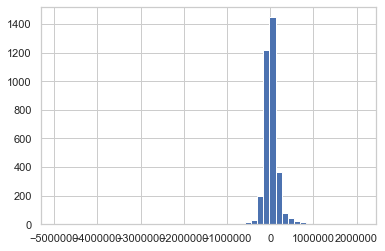

In [110]:
plt.hist(residuals, bins=50)
plt.show()

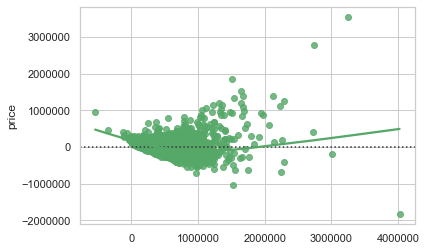

In [20]:
sns.residplot(y_pred, y_test, lowess=True, color="g")
plt.show()

## Log

In [ ]:
# Looking at the residuals, if we see a relationship we have not captured, we may need
# to take the log of the target (price)

In [17]:
target_log = np.log(target)

In [21]:
#instantiate a linear regression object
log_model = LinearRegression()

#fit the linear regression to the log of the target variable
log_model.fit(X_train, np.log(y_train))

#access output
print(log_model.intercept_)
print(log_model.coef_)

-105.35667284051515
[-1.15161220e-02  5.14728749e-02  2.48107992e-05  4.93331101e-07
  7.63063268e-02  4.29635415e-01  2.16732289e-02  7.37078541e-02
  1.55610160e-01 -1.68886559e-05  4.16994551e-05 -2.97056646e-03
  2.35782970e-03 -7.20975533e-04  1.41668244e+00 -1.84779139e-01
  1.96507855e-04 -2.92254631e-08  5.09077841e-02  5.15381102e-02
  6.05893023e-05  1.90828516e-01 -4.65898885e+00  1.11989268e-01
  7.64990106e-05]


In [22]:
y_log_train_pred = log_model.predict(X_train)

In [23]:
# Expoentiate predictions to rescale from logs back to original scale (dollars)
y_log_train_pred = np.exp(y_log_train_pred)

In [24]:
log_train_mae = metrics.mean_absolute_error(y_train, y_log_train_pred)
log_train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_log_train_pred))

print('Mean Absolute Error:', log_train_mae )
print('Root Mean Squared Error of training set:' , log_train_rmse)

Mean Absolute Error: 106478.32093950825
Root Mean Squared Error: 177828.07118061383


In [25]:
# Evaluate how well model predicts data

y_log_pred = log_model.predict(X_test)
y_log_pred = np.exp(y_log_pred) # <--- expoentiate predictions to rescale

test_log_mae = metrics.mean_absolute_error(y_test, y_log_pred)
test__log_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_log_pred))

print('Mean Absolute Error:' + str(test_log_mae))
print('Root Mean Squared Error of test set:' + str(test__log_rmse))

Mean Absolute Error:110712.9955173305
Root Mean Squared Error:207297.64539868053


In [26]:
# Compare RMSE between orginal and logged target
print('Original: ', int(test_rmse), "vs. Logged: ", int(test__log_rmse))

Original:  205913 vs. Logged:  207297


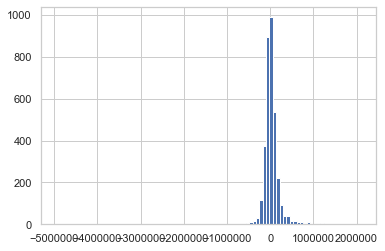

In [35]:
# Check the residuals

residuals = (y_test- y_log_pred)

plt.hist(residuals, bins=90)
plt.show()

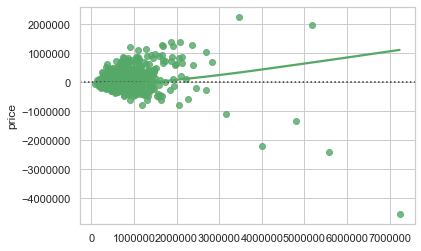

In [31]:
sns.residplot(y_log_pred, y_test, lowess=True, color="g")
plt.show()

## Evaluate polynomial model

In [36]:
# Train Test Split the polynomial data

#call train_test_split on the data and capture the results
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(df_poly3, target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train_poly.shape, "Target: ", y_train_poly.shape)
print("Training set - Features: ", X_test_poly.shape, "Target: ",y_test_poly.shape)

Training set - Features:  (13832, 3275) Target:  (13832,)
Training set - Features:  (3458, 3275) Target:  (3458,)


In [37]:
# Fit the model

#instantiate a linear regression object
lr_poly = LinearRegression()

#fit the linear regression to the data
lr_poly = lr_poly.fit(X_train_poly, y_train_poly)

In [38]:
# Predict on training set `
train_preds = lr_poly.predict(X_train_poly)

In [39]:
# Evaluate training data
train_mae_poly = metrics.mean_absolute_error(y_train_poly, train_preds)
train_mse_poly = metrics.mean_squared_error(y_train_poly, train_preds)
train_rmse_poly = np.sqrt(metrics.mean_squared_error(y_train_poly, train_preds))

print('Mean Absolute Error:', train_mae_poly )
print('Mean Squared Error:',  train_mse_poly)
print('Root Mean Squared Error:' , train_rmse_poly)

Mean Absolute Error: 86867.08495367132
Mean Squared Error: 15340982813.236408
Root Mean Squared Error: 123858.72118359857


In [40]:
# Predict the test set
test_preds = lr_poly.predict(X_test_poly)

In [41]:
# Evaluate the test set
test_mae_poly = metrics.mean_absolute_error(y_test_poly, test_preds)
test_rmse_poly = np.sqrt(metrics.mean_squared_error(y_test_poly, test_preds))


print('Mean Absolute Error:' + str(test_mae_poly))
# print('Mean Squared Error:' + str(metrics.mean_squared_error(____, ____)))
print('Root Mean Squared Error:' + str(test_rmse_poly))

Mean Absolute Error:192778.23550374113
Root Mean Squared Error:2537211.755528194


In [42]:
# Comparing our Model's performance on training data versus test data.
print('Training: ', int(train_rmse_poly), "vs. Testing: ", int(test_rmse_poly))

Training:  123858 vs. Testing:  2537211


# Feature Selection

## Scale

In [43]:
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

In [44]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 198481.35354156978


In [45]:
# Evaluate on the test set

#use fitted model to predict on the test examples
y_test_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)

print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 205913.27465251056
Training:  198481 vs. Testing:  205913


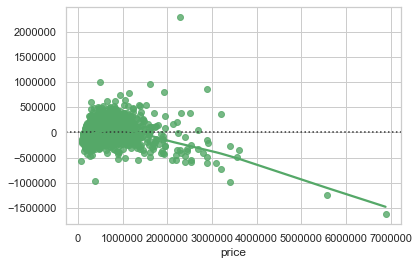

In [46]:
# Plot the residuals after fitting a linear model
sns.residplot( y_test, y_test_pred,lowess=True, color="g")

## Log

In [47]:
# Will our model perform better if we try to predict the log of the gross instead?

#take the natural log of the target variable
y_log = np.log(y_train)

#instantiate a linear regression object
lm_log = LinearRegression()

#fit the linear regression to the data
lm_log = lm_log.fit(X_train, y_log)

log_train_pred = lm_log.predict(X_train)

#log_train_pred the predictions to get them on the same original scale 
y_train_pred = np.exp(log_train_pred)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, log_train_pred))

print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 656777.4921426349


In [48]:
log_test_pred = lm_log.predict(X_test)
#exponentiate the predictions to get them on the same original scale 
log_test_pred = np.exp(log_test_pred)
log_test_rmse = np.sqrt(metrics.mean_squared_error(y_test, log_test_pred))

print('Testing Root Mean Squared Error:' , log_test_rmse)

Testing Root Mean Squared Error: 207297.64539863382


In [49]:
# Use new model to predict test set

y_test_pred = lm_log.predict(X_test)

#our model predcicte the log of gross, so now we must exponentiate to get the value in $
y_test_pred = np.exp(y_test_pred)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)

print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 207297.64539863382
Training:  656777 vs. Testing:  207297


## Polynomial

In [50]:
# Generate polynomial interaction features

poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(df_features)
poly2_columns = poly_2.get_feature_names(df_features.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.head()

X_train, X_test, y_train, y_test = train_test_split(df_poly2, target, random_state=9,test_size=0.2)

scaler2 = StandardScaler()
# fit the scaler to the training data
scaler2.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler2.transform(X_train), columns=df_poly2.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler2.transform(X_test), columns=df_poly2.columns)

# instantiate a linear regression object
lm_2 = LinearRegression()

#fit the linear regression to the data
lm_2 = lm_2.fit(X_train, y_train)

y_train_pred = lm_2.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 143685.33569760964


In [51]:
# use fitted model to predict on test data
y_pred = lm_2.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 158242.1656226109
Training:  143685 vs. Testing:  158242


In [52]:
poly_3 = PolynomialFeatures(degree=3, include_bias=False)
poly3_data = poly_3.fit_transform(df_features)
poly3_columns = poly_3.get_feature_names(df_features.columns)
df_poly3 = pd.DataFrame(poly3_data, columns=poly3_columns)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df_poly3, target, random_state=9,test_size=0.2)
scaler3 = StandardScaler()
# fit the scaler to the training data
scaler3.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler3.transform(X_train), columns=df_poly3.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler3.transform(X_test), columns=df_poly3.columns)

In [54]:
# instantiate a linear regression object
lm_3 = LinearRegression()

#fit the linear regression to the data
lm_3 = lm_3.fit(X_train, y_train)

y_train_pred = lm_3.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

In [55]:
# use fitted model to predict on test data
y_pred = lm_3.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)

print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 550563427402153.3
Training:  93810 vs. Testing:  550563427402153


## Removing Variables based on correlation coefficient

In [58]:
X_train_8, X_test_8, y_train_8, y_test_8 = train_test_split(df_features, target, random_state=9,test_size=0.2)

# Create correlation matrix
corr_matrix = X_train_8.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_built_or_renovated,years_old,age_feature,sqft_living_relative_to_nabe,renovated,viewed,sq_ft_per_flr
bedrooms,NaN,0.525995,0.586839,0.030560,0.179315,0.007167,0.078216,0.016175,0.363436,0.487800,0.306275,0.164581,0.012288,0.146273,0.007597,0.120493,0.398813,0.019807,0.171054,0.171177,0.066370,0.432054,0.011956,0.079132,0.391307
bathrooms,NaN,NaN,0.754353,0.078504,0.492800,0.072574,0.188267,0.123807,0.664316,0.684122,0.288169,0.507678,0.051492,0.193006,0.021930,0.215522,0.565778,0.074053,0.537704,0.538127,0.395825,0.454603,0.050965,0.175449,0.369163
sqft_living,NaN,NaN,NaN,0.168833,0.351500,0.121827,0.285025,0.062317,0.760049,0.874431,0.442037,0.316571,0.052999,0.187331,0.051552,0.228677,0.751843,0.170894,0.339497,0.340035,0.239972,0.569383,0.052723,0.267094,0.655712
sqft_lot,NaN,NaN,NaN,NaN,0.004269,0.016966,0.077697,0.010798,0.116790,0.181008,0.012922,0.054997,0.005931,0.126555,0.088823,0.219890,0.148123,0.730340,0.053782,0.053873,0.037349,0.068481,0.006025,0.068412,0.206438
floors,NaN,NaN,NaN,NaN,NaN,0.026498,0.025216,0.257399,0.456882,0.526344,0.249500,0.481202,0.008334,0.058942,0.045221,0.124712,0.277224,0.010396,0.496894,0.497283,0.606556,0.200132,0.008279,0.012966,0.251102
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,0.418471,0.006766,0.096860,0.083276,0.096845,0.020006,0.094712,0.033314,0.006153,0.039215,0.098347,0.024004,0.007196,0.007287,0.007568,0.042287,0.095117,0.278525,0.067371
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.040953,0.251795,0.164209,0.283196,0.046915,0.092113,0.090405,0.008581,0.073212,0.283037,0.069932,0.017950,0.017954,0.025120,0.074540,0.092229,0.924612,0.177790
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.145388,0.157424,0.162766,0.363959,0.060430,0.005186,0.013361,0.109302,0.093753,0.011136,0.397751,0.396936,0.309929,0.025191,0.059953,0.042391,0.049436
grade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.755676,0.167599,0.448011,0.011643,0.179040,0.116612,0.191478,0.713230,0.114429,0.459761,0.460367,0.319937,0.277994,0.011241,0.235117,0.473701
sqft_above,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048646,0.420815,0.025760,0.255650,0.002408,0.334193,0.728536,0.186486,0.433176,0.433680,0.345789,0.418826,0.025629,0.146787,0.630178


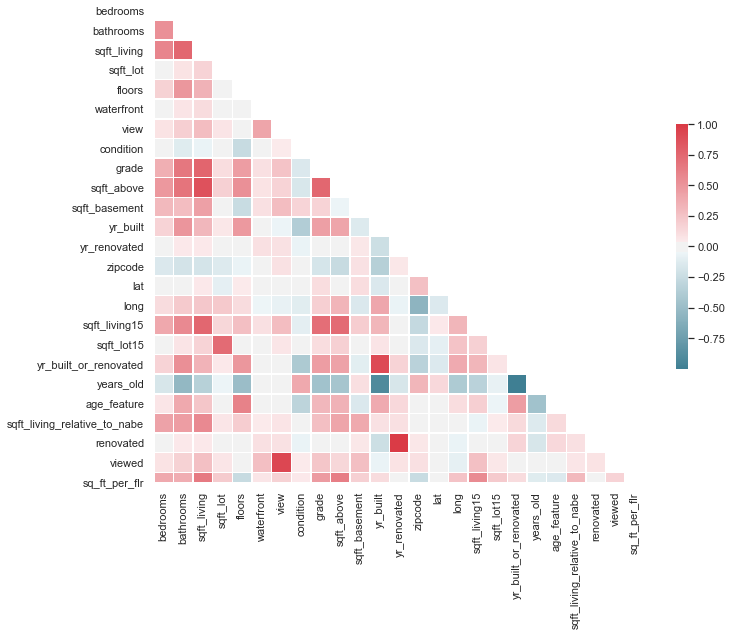

In [59]:
sns.set(style="white")

# Compute the correlation matrix
corr = X_train_8.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [60]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

#if you change inplace to True it will go through and drop all of those columns from the dataset
X_train_8.drop(columns=to_drop, inplace=False)
X_test_8.drop(columns=to_drop, inplace=False)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age_feature,sqft_living_relative_to_nabe,sq_ft_per_flr
13347,4,2.75,1610,11201,1.0,0,0,5,7,1020,590,1982,0,98033,47.7024,-122.198,1610,9000,625,1.000000,1020.0
12171,3,2.00,1610,13309,1.0,0,0,4,7,1610,0,1967,0,98042,47.3398,-122.133,1610,15725,100,1.000000,1610.0
5900,3,1.75,1900,5520,1.0,0,0,3,7,1280,620,1982,0,98118,47.5549,-122.292,1330,5196,625,1.428571,1280.0
7160,4,3.50,2690,5564,2.0,0,0,3,7,2690,0,2007,0,98038,47.3537,-122.018,2210,4046,2500,1.217195,1345.0
13494,3,1.75,1170,8740,1.0,0,0,4,7,1170,0,1968,0,98052,47.6849,-122.117,1870,8448,121,0.625668,1170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4742,4,2.25,1900,10950,1.0,0,0,4,7,1400,500,1959,0,98032,47.3582,-122.284,1700,11850,4,1.117647,1400.0
11094,4,2.50,1870,8190,1.0,0,0,3,7,1100,770,1977,0,98058,47.4521,-122.161,1590,9150,361,1.176101,1100.0
5004,4,2.25,2320,8760,1.0,0,0,4,8,1160,1160,1966,0,98032,47.3627,-122.285,1970,8690,81,1.177665,1160.0
5925,3,3.25,1530,1786,2.0,0,0,3,8,1200,330,2007,0,98117,47.6783,-122.366,1390,2900,2500,1.100719,600.0


In [61]:
to_drop

['yr_built_or_renovated', 'years_old', 'renovated', 'viewed']

## Variance Inflation Factor

In [63]:
[variance_inflation_factor(X_train.values, i) for i in range(X_train_8.shape[1])]

KeyboardInterrupt: 

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_features.values, i) for i in range(df_features.shape[1])]
vif["features"] = df_features.columns
vif.round(1)

In [ ]:
df_features.corrwith(target).abs()

## Select best features based on statistical measure

In [ ]:
# Filter methods: before we fit the model

In [64]:
X_train.shape #<--- going back to our 3rd deg poly

(13832, 3275)

In [67]:
selector = SelectKBest(f_regression, k=20)

selector.fit(X_train, y_train)

SelectKBest(k=20, score_func=<function f_regression at 0x1a21ade1e0>)

In [68]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

In [69]:
list(removed_columns)

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'yr_built_or_renovated',
 'years_old',
 'age_feature',
 'sqft_living_relative_to_nabe',
 'renovated',
 'viewed',
 'sq_ft_per_flr',
 'bedrooms^2',
 'bedrooms bathrooms',
 'bedrooms sqft_living',
 'bedrooms sqft_lot',
 'bedrooms floors',
 'bedrooms waterfront',
 'bedrooms view',
 'bedrooms condition',
 'bedrooms grade',
 'bedrooms sqft_above',
 'bedrooms sqft_basement',
 'bedrooms yr_built',
 'bedrooms yr_renovated',
 'bedrooms zipcode',
 'bedrooms lat',
 'bedrooms long',
 'bedrooms sqft_living15',
 'bedrooms sqft_lot15',
 'bedrooms yr_built_or_renovated',
 'bedrooms years_old',
 'bedrooms age_feature',
 'bedrooms sqft_living_relative_to_nabe',
 'bedrooms renovated',
 'bedrooms viewed',
 'bedrooms sq_ft_per_flr',
 'bathrooms^2',
 'bathrooms sqft_livin

In [70]:
list(selected_columns)

['sqft_living^2',
 'sqft_living grade',
 'bathrooms sqft_living grade',
 'sqft_living^2 condition',
 'sqft_living^2 grade',
 'sqft_living^2 zipcode',
 'sqft_living^2 lat',
 'sqft_living^2 long',
 'sqft_living^2 yr_built_or_renovated',
 'sqft_living condition grade',
 'sqft_living condition sqft_living15',
 'sqft_living grade^2',
 'sqft_living grade yr_built',
 'sqft_living grade zipcode',
 'sqft_living grade lat',
 'sqft_living grade long',
 'sqft_living grade sqft_living15',
 'sqft_living grade yr_built_or_renovated',
 'sqft_living sqft_living15 sqft_living_relative_to_nabe',
 'grade sqft_living15 sqft_living_relative_to_nabe']

In [71]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)

Training Root Mean Squared Error: 187311.00701216818
Testing Root Mean Squared Error: 175463.45029975707


In [72]:
list(zip(selected_columns, lm_kbest.coef_))

[('sqft_living^2', 55480227.29060055),
 ('sqft_living grade', -42419794.97782215),
 ('bathrooms sqft_living grade', 84976.5664432847),
 ('sqft_living^2 condition', -87970.52719296358),
 ('sqft_living^2 grade', -70670.81342000437),
 ('sqft_living^2 zipcode', -174450264.84411082),
 ('sqft_living^2 lat', -4482941.121236419),
 ('sqft_living^2 long', -65022434.034362115),
 ('sqft_living^2 yr_built_or_renovated', 3016690.5262230723),
 ('sqft_living condition grade', -168571.20049076574),
 ('sqft_living condition sqft_living15', 387492.3091579864),
 ('sqft_living grade^2', 643492.5176178678),
 ('sqft_living grade yr_built', -3591301.542907551),
 ('sqft_living grade zipcode', 85761639.91262944),
 ('sqft_living grade lat', 19931775.17542802),
 ('sqft_living grade long', 17172637.94272647),
 ('sqft_living grade sqft_living15', -337847.873890835),
 ('sqft_living grade yr_built_or_renovated', -313453.834174179),
 ('sqft_living sqft_living15 sqft_living_relative_to_nabe', 55480227.29045892),
 ('gra

In [73]:
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n')

Original:  550563427402153.3 
 KBest:    175463.45029975707 



## Wrapper methods

In [83]:
# After we fit the model

X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=34,test_size=0.2)
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
            'waterfront', 'view', 'condition', 'grade', 'sqft_above',
            'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
            'long', 'sqft_living15', 'sqft_lot15', 'yr_built_or_renovated',
            'years_old', 'age_feature', 'sqft_living_relative_to_nabe',
            'renovated', 'viewed', 'sq_ft_per_flr']

df_features = df[features]





# Recursive Feature Elimination

ols = linear_model.LinearRegression()

# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)

RFECV(cv=5,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=-1, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [84]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]

In [85]:
list(removed_rfe)

['sqft_lot', 'sqft_lot15', 'sq_ft_per_flr']

In [86]:
len(list(selected_rfe))

22

In [88]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)

Training Root Mean Squared Error: 198604.8999954591
Testing Root Mean Squared Error: 205965.08667427846


In [89]:
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n',
      "RFE:     ", testRFE_rmse)

Original:  550563427402153.3 
 KBest:    175463.45029975707 
 RFE:      205965.08667427846


## Embedded Features

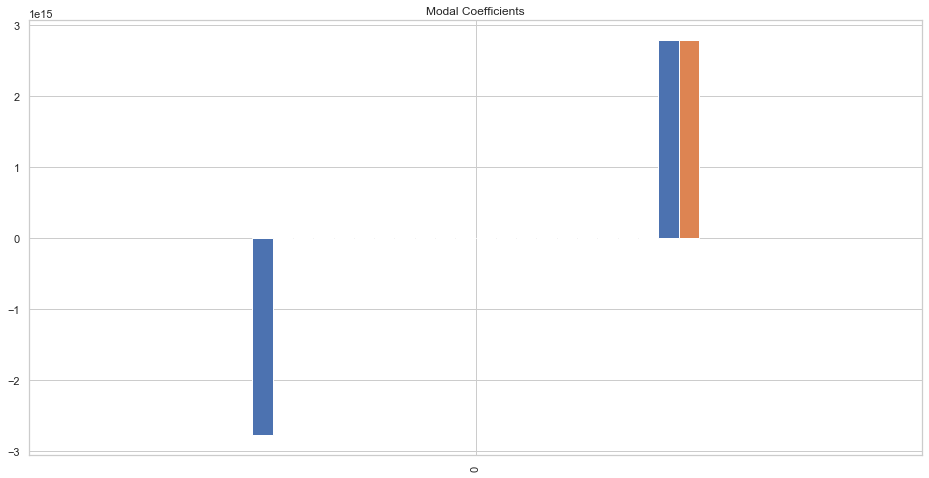

In [90]:
# Plot to compare the size of all of our coefficients form our final model created by RFE
# While we're fitting the model

coef = pd.DataFrame(data=lm_rfe.coef_ ).T
coef.columns = selected_rfe

model_coef = coef.T.sort_values(by=0).T
model_coef.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8),)

In [91]:
## training the model

lasso = Lasso(alpha=0.1, normalize=False) #<-- larger the alpha, larger the penalty, push more feature coefficients down to zero

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse_lasso01 = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse_lasso01 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Training Error: '+ str(train_rmse_lasso01) )
print('Testing Error: '+ str(test_rmse_lasso01) )

Training Error: 123974.38209253187
Testing Error: 207297.64539863382


/Users/elliotmacy/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 273629652250132.34, tolerance: 191529062678.72354
  positive)


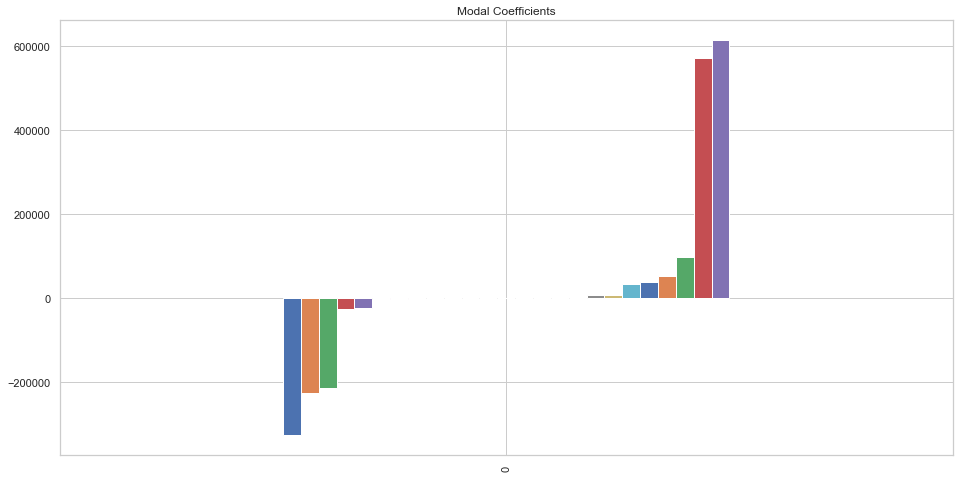

In [92]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [93]:
coeff_df = lasso_coef01.T

coeff_df[coeff_df[0]==0].count()

0    0
dtype: int64

In [94]:
coeff_df[coeff_df[0]==0]

,0


In [95]:
print('Original: \t', test_rmse, '\n',
      "KBest: \t", testK_rmse, '\n',
      "RFE: \t \t", testRFE_rmse, '\n', 
      "Lasso 0.01: \t",  test_rmse_lasso01, '\n')

Original: 	 550563427402153.3 
 KBest: 	 175463.45029975707 
 RFE: 	 	 205965.08667427846 
 Lasso 0.01: 	 207297.64539863382 



## Final model

In [96]:
scaler = StandardScaler()

#fit and transform the  data
df_poly3 = pd.DataFrame(data=scaler.fit_transform(df_poly3), columns=df_poly3.columns) # <-- running on entire dataset (df_poly3), not just train or test

In [100]:
selector = SelectKBest(f_regression, k=20)

selector.fit(df_features, target)

SelectKBest(k=20, score_func=<function f_regression at 0x1a21ade1e0>)

In [101]:
selected_columns = X_train.columns[selector.get_support()]
# removed_columns = X_train.columns[~selector.get_support()]

In [102]:
#instantiate a linear regression object
lm_final = LinearRegression()

#fit the linear regression to the data
lm_final = lm_final.fit(df_poly3[selected_columns], target)

In [103]:
lm_final.coef_ # <--- final model for entire dataset

array([-2.49619790e+04,  3.63158626e+04, -4.98861537e+17, -3.25355217e+03,
       -1.21931722e+03,  5.20488045e+04,  4.27558197e+04,  1.20645318e+05,
        4.49652315e+17,  2.40290185e+17,  1.68929414e+06,  7.73511939e+04,
       -1.02557853e+05,  7.07028706e+05,  7.98901754e+05,  1.81377008e+04,
       -1.02620426e+05, -1.65127790e+06, -3.61257497e+03,  4.32899702e+03])

In [104]:

pickle_out = open("model.pickle","wb")
pickle.dump(lm_final, pickle_out)
pickle_out.close()

In [106]:
pickle_out = open("scaler.pickle", "wb")
pickle.dump(scaler, pickle_out)
pickle_out.close

<function BufferedWriter.close>